### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics using Python

## Assignment template: COVID-19 data

## Student Note
This template can be used to better understand the suggested assignment workflow and how to approach the questions. You are welcome to add code and Markdown blocks to the various sections to add either code or comments. Make sure to add code cells as applicable, and to comment all your code blocks.

You have the option to populate your Notebook with all the elements typically contained within the report, or to submit a separate report. In the case of submitting your Notebook, you can embed images, links and text where appropriate in addition to the text notes added.

**SPECIAL NOTE**
- Submit your Jupyter Notebook with the following naming convention: `LSE_DA201_assignment_[your name]_[your surname]` (remove the square brackets).
- You should submit a zipped folder containing all the elements used in your Notebook (data files, images, etc.).

> ***Markdown notes:*** Remember to change cell types to `Markdown`. You can review [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to find out how to add formatted text, links and images to your Markdown documents.

## 0) Environment preparation
These settings are provided for you. You do not need to make any changes.

In [247]:
# Import the required libraries and set the plotting options
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(15,10)})

### Required: Report submission:
Insert URL (to your public GitHub repository) and a screenshot - double click cell to edit
- [My Github Repo](https://github.com/username/reponame)
- Screenshot demo (replace with your own).

!['My Github screenshot](http://github.com/apvoges/lse-ca/blob/main/GitHubScreenshot.png?raw=true)
(Note that this only works if your repo is set to **public**. Alternatively you need to refer to a local image and include this image in your submission.)

### 1.2) Presentation expectations:
- Describe the role and how workflow tools such as GitHub can be used to add value to organisations.

### Optional for notebook/Required for presentation.
- You can use this cell as placeholder for bullet points to include in your presentation. 
- This section will not be graded in the Notebook, grades awarded based on presentation content only. 

(Double-click to edit)

## 2) Assignment activity 2: 

### 2.1) Report expectations:
- Load the files `covid_19_uk_cases.csv` and `covid_19_uk_vaccinated.csv` and explore the data.
- Explore the data using the `info()`, `describe()`, `shape` and `value_counts()` methods, and note the observations regarding data types, number or records and features.
- Identify missing data.
- Filter/subset data.
- Aggregate data (totals and by month).
- Note observations.

In [249]:
# Load the COVID-19 cases and vaccine data sets as cov and vac respectively
# Import pandas and the data.
import pandas as pd

cov = pd.read_csv('covid_19_uk_cases.csv')
vac = pd.read_csv('covid_19_uk_vaccinated.csv')

vac.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0,0,0


In [251]:
# Explore the DataFrames with the appropriate functions
# 3.a View the first and last five rows.
cov.head()
cov.tail()
vac.head()
vac.tail()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
7579,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-10,1070,1216,1070
7580,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-11,1300,1604,1300
7581,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-12,1482,2027,1482
7582,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-13,0,0,0
7583,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-14,0,0,0


In [320]:
# 3.b Determine the number of rows and columns.
print(cov.shape)
print(vac.shape)

(7584, 12)
(7584, 11)


In [321]:
# 3.c Determine the data types in the DataFrames.
print(cov.dtypes)
print(vac.dtypes)

Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Deaths                      float64
Cases                       float64
Recovered                   float64
Hospitalised                float64
dtype: object
Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Vaccinated                    int64
First Dose                    int64
Second Dose                   int64
dtype: object


In [322]:
# 3.d Determine the number of missing values.
print(cov.isna().sum())
print(vac.isna().sum())

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Deaths                      2
Cases                       2
Recovered                   2
Hospitalised                2
dtype: int64
Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Vaccinated                  0
First Dose                  0
Second Dose                 0
dtype: int64


In [323]:
# Create DataFrame based on Gibraltar data
# Hint: newdf = df[df[col]==index]
# 4. Filter the data for the region 'Gibraltar'.
Gibraltar = cov[cov['Province/State']=='Gibraltar']

Gibraltar.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
3792,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0.0,0.0,0.0,0.0
3793,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-23,0.0,0.0,0.0,0.0
3794,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-24,0.0,0.0,0.0,0.0
3795,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-25,0.0,0.0,0.0,0.0
3796,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-26,0.0,0.0,0.0,0.0


In [324]:
# 5. Use the following code snippet to view the DataFrame.
pd.set_option("display.max_rows", None)

cov.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,0.0,0.0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,0.0,0.0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,0.0,0.0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0.0,0.0,0.0,0.0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0.0,0.0,0.0,0.0


In [325]:
# 6. Subset the Gibraltar DataFrame that you have created consisting of the following columns:
# Deaths, Cases, Recovered and Hospitalised.
Gibraltar_subset = Gibraltar[['Deaths', 'Cases', 'Recovered', 'Hospitalised']]
Gibraltar_subset.head()

,Deaths,Cases,Recovered,Hospitalised
3792,0.0,0.0,0.0,0.0
3793,0.0,0.0,0.0,0.0
3794,0.0,0.0,0.0,0.0
3795,0.0,0.0,0.0,0.0
3796,0.0,0.0,0.0,0.0


In [326]:
# 7. Run the describe() function to generate descriptive statistics.
Gibraltar_subset.describe()

,Deaths,Cases,Recovered,Hospitalised
count,632.000000,632.000000,632.000000,632.000000
mean,40.208861,2237.109177,1512.821203,1027.625000
std,45.332832,2136.268090,1817.096755,1145.681058
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,177.000000,109.500000,157.750000
50%,5.000000,1036.500000,323.500000,675.500000
75%,94.000000,4286.000000,4122.500000,1548.000000
max,97.000000,5727.000000,4670.000000,4907.000000


In [333]:
# Explore behaviour over time.
# 8.d How has the number of vaccinated individuals changed over time? What might these changes indicate?
vac.sort_values(by=['Vaccinated'], inplace=True, ascending=False)
print(vac.head())

print(vac['Vaccinated'].max())

# The vaccinated rate reached to the highest in April and May, 2021 (highest point:69,619) and slightly going down afterwards.

     Province/State  Country/Region        Lat       Long  \
4278      Gibraltar  United Kingdom  36.140800  -5.353600   
4250      Gibraltar  United Kingdom  36.140800  -5.353600   
5542     Montserrat  United Kingdom  16.742498 -62.187366   
5514     Montserrat  United Kingdom  16.742498 -62.187366   
4242      Gibraltar  United Kingdom  36.140800  -5.353600   

     ISO 3166-1 Alpha 3-Codes                  Sub-region Name  \
4278                      GIB                  Southern Europe   
4250                      GIB                  Southern Europe   
5542                      MSR  Latin America and the Caribbean   
5514                      MSR  Latin America and the Caribbean   
4242                      GIB                  Southern Europe   

      Intermediate Region Code        Date  Vaccinated  First Dose  \
4278                         0  2021-05-22       69619       25676   
4250                         0  2021-04-24       68454       18596   
5542                      

In [262]:
vac.sort_values(by=['Vaccinated'], inplace=True, ascending=True)
vac

vac.sort_values(by=['Date'], inplace=True, ascending=True)
vac.head()

# From 2020-01-22, there was zero vaccinated individual until January, 2021.

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
3792,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0,0,0
1896,Cayman Islands,United Kingdom,19.3133,-81.2546,CYM,Latin America and the Caribbean,29,2020-01-22,0,0,0
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0,0,0
3160,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,FLK,Latin America and the Caribbean,5,2020-01-22,0,0,0
6320,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,TCA,Latin America and the Caribbean,29,2020-01-22,0,0,0


In [263]:
# 8.f On which date(s) are there values missing, and from which columns and rows are these values missing? 
# Which states or provinces do the missing values belong to?

cov_na = cov[cov.isna().any(axis=1)]
cov_na

# On 2020-09-21 and 2020-09-21 in "Cases" file, there are missing values in columns Deaths, Cases, Recovered and Hospitalised.
# the missing values belong to the state "Bermuda".

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
875,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-21,NaN,NaN,NaN,NaN
876,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-22,NaN,NaN,NaN,NaN


In [264]:
vac_na = vac[vac.isna().any(axis=1)]
vac_na

# There is no missing value in "Vaccinated" file.

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose


In [334]:
# 8.g Anything unusual about the filtered Gilbraltar DataFrame?

Gibraltar = cov[cov['Province/State']=='Gibraltar']

Gibraltar['Deaths'].max()
Gibraltar_deaths = Gibraltar[Gibraltar['Deaths'] > 50]
Gibraltar_deaths

Gibraltar_deaths.sort_values(by=['Deaths'], inplace=True, ascending=False)
Gibraltar_deaths.head()

# In the highest death and case rate, the hospitalises values are showing as zero on both 2021-10-14 
# and 2021-10-13, which can be human erros or misscalculation. Also, the recovered rate seems missing.

/Users/paipufei/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
4423,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-14,97.0,5727.0,0.0,0.0
4386,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-09-07,97.0,5399.0,0.0,997.0
4397,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-09-18,97.0,5476.0,0.0,962.0
4396,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-09-17,97.0,5469.0,0.0,988.0
4395,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-09-16,97.0,5463.0,0.0,1014.0


In [335]:
Gibraltar['Cases'].max()
Gibraltar_Cases = Gibraltar[Gibraltar['Cases'] > 5000]

Gibraltar_Cases.sort_values(by=['Cases'], inplace=True, ascending=False)
Gibraltar_Cases.head()

/Users/paipufei/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
4423,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-14,97.0,5727.0,0.0,0.0
4422,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-13,97.0,5707.0,0.0,0.0
4421,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-12,97.0,5682.0,0.0,876.0
4420,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-11,97.0,5655.0,0.0,876.0
4419,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-10,97.0,5626.0,0.0,858.0


In [267]:
Gibraltar['Recovered'].max()

Gibraltar_Recovered = Gibraltar[Gibraltar['Recovered'] > 4000]

Gibraltar_Recovered.sort_values(by=['Recovered'], inplace=True, ascending=False)
Gibraltar_Recovered.head()

/Users/paipufei/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
4352,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-08-04,95.0,5056.0,4670.0,724.0
4351,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-08-03,94.0,5031.0,4644.0,751.0
4350,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-08-02,94.0,5000.0,4635.0,777.0
4349,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-08-01,94.0,4980.0,4614.0,748.0
4348,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-07-31,94.0,4965.0,4471.0,745.0


### 2.2) Presentation expectations:
Use the process of exploring the data for Gibraltar as an example to provide a brief description of the various phases to help your team to understand the process. Keep it high level and make sure to focus on both specifics relating to the case (first dose, second dose per region, total and over time) and brief observations regarding the process. Assignment activity 2 considers basic data exploration.
- Can we make decisions based on total numbers only, or do trends over time offer additional insights?
- Why it is important to explore the data, what are the typical mistakes made in this phase?

The dataset provides detailed information during the pandemic. Interestingly, there are some missing values and unusual patterns in the values of deaths, recovered and hospitalised columns, which might be caused by human errors or miscalculation during the time as the pandemic was unexpected.
There is a default index in DataFrame starting with number 0. I chose not to create a new set of indexing as I used other functions to filter the relevant data. The initial insights I have discovered is the missing values and the max/min values in the file. By filtering and sorting the shape, type, and max/min of each column, I have developed a deep insight into the story during the time. Firstly, the number of the vaccinated individuals has changed a lot over time. The vaccinated rate reached to the highest in April and May 2021 (the highest point is recorded 69,619) and slightly goes down afterwards. From 2020-01-22, there was zero vaccinated individual until January 2021, showing that the vaccination scheme might start to roll over from the month. Moreover, there are some missing values in columns Deaths, Cases, Recovered and Hospitalised on the date 2020-09-21 and 2020-09-22 in cases. The missing values all belong to "Bermuda". Fortunately, there is no missing value in "Vaccinated" file.
Some unusual findings are discovered in Gilbraltar DataFrame. During the time appearing the highest death and case rate, the hospitalised values are showing as zero on both 2021-10-14 and 2021-10-13, which can be human errors or miscalculation. Also, some recovered rate seems missing as well as the values are zero. The data reflects that there is certain relevance among death, cases, recovered and hospitalised growth rate. When the rate of death and case increase, the recovered rate tend to decrease and the hospitalised value grows in the meanwhile.

## 3) Assignment activity 3: 

### 3.1) Report expectations:
- Merge and explore the data.
- Convert the data type of the Date column from object to DateTime.
- Create a data set that meets the expected parameters.
- Add calculated features to DataFrames (difference between first and second dose vaccinations).
- Filter and sort output.
- Observe totals and percentages as a total and over time.
- Note observations.

Merge the DataFrames without duplicating columns. The new DataFrame (e.g. `covid`) will have `7584` rows and the following columns: `Province/State, Country/Region, Date, Vaccinated, First Dose, Second Dose, Deaths, Cases, Recovered, Hospitalised`.

In [269]:
# 2.a Merge: Join the DataFrames as covid where you merge cov and vac.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

covid = pd.merge(cov, vac, on=['Date','Province/State','Lat','Long'], how='left')
covid.head()

,Province/State,Country/Region_x,Lat,Long,ISO 3166-1 Alpha 3-Codes_x,Sub-region Name_x,Intermediate Region Code_x,Date,Deaths,Cases,Recovered,Hospitalised,Country/Region_y,ISO 3166-1 Alpha 3-Codes_y,Sub-region Name_y,Intermediate Region Code_y,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,0.0,0.0,United Kingdom,AIA,Latin America and the Caribbean,29,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,0.0,0.0,United Kingdom,AIA,Latin America and the Caribbean,29,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,0.0,0.0,United Kingdom,AIA,Latin America and the Caribbean,29,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0.0,0.0,0.0,0.0,United Kingdom,AIA,Latin America and the Caribbean,29,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0.0,0.0,0.0,0.0,United Kingdom,AIA,Latin America and the Caribbean,29,0,0,0


In [270]:
# 2.b Determine the column names and data types: Explore the new DataFrame.
print(covid.shape)

# pring data type
print(covid.dtypes)

# print column names
print(list(covid))

(7584, 19)
Province/State                 object
Country/Region_x               object
Lat                           float64
Long                          float64
ISO 3166-1 Alpha 3-Codes_x     object
Sub-region Name_x              object
Intermediate Region Code_x      int64
Date                           object
Deaths                        float64
Cases                         float64
Recovered                     float64
Hospitalised                  float64
Country/Region_y               object
ISO 3166-1 Alpha 3-Codes_y     object
Sub-region Name_y              object
Intermediate Region Code_y      int64
Vaccinated                      int64
First Dose                      int64
Second Dose                     int64
dtype: object
['Province/State', 'Country/Region_x', 'Lat', 'Long', 'ISO 3166-1 Alpha 3-Codes_x', 'Sub-region Name_x', 'Intermediate Region Code_x', 'Date', 'Deaths', 'Cases', 'Recovered', 'Hospitalised', 'Country/Region_y', 'ISO 3166-1 Alpha 3-Codes_y', 'Sub-region 

In [271]:
# 2.c Convert the data type of the Date column from object to DateTime: Fix the date column data type.
covid['Date'] = pd.to_datetime(covid['Date'], format="%Y-%m-%d")
covid.dtypes

Province/State                        object
Country/Region_x                      object
Lat                                  float64
Long                                 float64
ISO 3166-1 Alpha 3-Codes_x            object
Sub-region Name_x                     object
Intermediate Region Code_x             int64
Date                          datetime64[ns]
Deaths                               float64
Cases                                float64
Recovered                            float64
Hospitalised                         float64
Country/Region_y                      object
ISO 3166-1 Alpha 3-Codes_y            object
Sub-region Name_y                     object
Intermediate Region Code_y             int64
Vaccinated                             int64
First Dose                             int64
Second Dose                            int64
dtype: object

In [272]:
# 2.d Drop unnecessary columns: Clean up / drop unnecessary columns. 
covid_sub = covid[['Date','Province/State','Country/Region_x','Cases','Vaccinated','First Dose','Second Dose']]
covid_sub.head()

,Date,Province/State,Country/Region_x,Cases,Vaccinated,First Dose,Second Dose
0,2020-01-22,Anguilla,United Kingdom,0.0,0,0,0
1,2020-01-23,Anguilla,United Kingdom,0.0,0,0,0
2,2020-01-24,Anguilla,United Kingdom,0.0,0,0,0
3,2020-01-25,Anguilla,United Kingdom,0.0,0,0,0
4,2020-01-26,Anguilla,United Kingdom,0.0,0,0,0


In [336]:
# 3. Determine the number of cases across "the UK".
# Filter the data for just the UK.
uk = covid_sub[covid_sub['Country/Region_x']=='United Kingdom']
uk.head()

,Date,Province/State,Country/Region_x,Cases,Vaccinated,First Dose,Second Dose
0,2020-01-22,Anguilla,United Kingdom,0.0,0,0,0
1,2020-01-23,Anguilla,United Kingdom,0.0,0,0,0
2,2020-01-24,Anguilla,United Kingdom,0.0,0,0,0
3,2020-01-25,Anguilla,United Kingdom,0.0,0,0,0
4,2020-01-26,Anguilla,United Kingdom,0.0,0,0,0


In [343]:
# 3.a Groupby and calculate difference between first and second dose
# Option 2: uk.groupby('Province/State_y')[['First Dose']].agg(['sum','mean'])

# 1st dose.
uk.groupby('Province/State')['First Dose'].sum().reset_index().sort_values('First Dose', ascending=False)

,Province/State,First Dose
6,Gibraltar,5870786
8,Montserrat,5401128
2,British Virgin Islands,5166303
0,Anguilla,4931470
7,Isle of Man,4226984
5,Falkland Islands (Malvinas),3757307
3,Cayman Islands,3522476
4,Channel Islands,3287646
11,Turks and Caicos Islands,3052822
1,Bermuda,2817981


In [342]:
# 2nd dose.
uk.groupby('Province/State')['Second Dose'].sum().reset_index().sort_values('Second Dose', ascending=False)

,Province/State,Second Dose
6,Gibraltar,5606041
8,Montserrat,5157560
2,British Virgin Islands,4933315
0,Anguilla,4709072
7,Isle of Man,4036345
5,Falkland Islands (Malvinas),3587869
3,Cayman Islands,3363624
4,Channel Islands,3139385
11,Turks and Caicos Islands,2915136
1,Bermuda,2690908


In [349]:
# Vaccinated does.
uk.groupby('Province/State')['Vaccinated'].sum().reset_index().sort_values('Vaccinated', ascending=False)

,Province/State,Vaccinated
6,Gibraltar,5606041
8,Montserrat,5157560
2,British Virgin Islands,4933315
0,Anguilla,4709072
7,Isle of Man,4036345
5,Falkland Islands (Malvinas),3587869
3,Cayman Islands,3363624
4,Channel Islands,3139385
11,Turks and Caicos Islands,2915136
1,Bermuda,2690908


In [350]:
# 3.b Determine if there are differences "over time" between the first and second dose application.
# Groupby and calculate the difference between first and second dose over time

uk.groupby('Date')['First Dose','Second Dose'].sum().reset_index().sort_values('First Dose', ascending=False)
uk.groupby('Date')['First Dose','Second Dose'].sum().reset_index().sort_values('Second Dose', ascending=False)

# Jan - Mar is the months that people have higher vacinnated rate for 1st dose, whilst April and May are the month with higher vaccinated rate for 2nd dose.

/var/folders/2f/wnrnfhp12vd172l5w1xyffl00000gn/T/ipykernel_90380/824135231.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  uk.groupby('Date')['First Dose','Second Dose'].sum().reset_index().sort_values('First Dose', ascending=False)
/var/folders/2f/wnrnfhp12vd172l5w1xyffl00000gn/T/ipykernel_90380/824135231.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  uk.groupby('Date')['First Dose','Second Dose'].sum().reset_index().sort_values('Second Dose', ascending=False)


,Date,First Dose,Second Dose
486,2021-05-22,205411,556952
458,2021-04-24,148767,547636
450,2021-04-16,135557,499664
451,2021-04-17,139445,499635
463,2021-04-29,122567,491567
444,2021-04-10,111110,475230
500,2021-06-05,203613,473378
470,2021-05-06,135471,473000
471,2021-05-07,133000,465822
457,2021-04-23,135785,465016


In [352]:
# 4.a Which Province/State has the highest number of individuals who have received a first dose but not a second dose?
uk['firstonly'] = uk['First Dose'] - uk['Second Dose']
uk.groupby('Province/State')['First Dose','Second Dose','firstonly'].sum().reset_index()\
.sort_values('firstonly', ascending=False)

# Gibraltar has the highest number for people who took the first dose only.

/var/folders/2f/wnrnfhp12vd172l5w1xyffl00000gn/T/ipykernel_90380/3141682887.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  uk.groupby('Province/State')['First Dose','Second Dose','firstonly'].sum().reset_index()\


,Province/State,First Dose,Second Dose,firstonly
6,Gibraltar,5870786,5606041,264745
8,Montserrat,5401128,5157560,243568
2,British Virgin Islands,5166303,4933315,232988
0,Anguilla,4931470,4709072,222398
7,Isle of Man,4226984,4036345,190639
5,Falkland Islands (Malvinas),3757307,3587869,169438
3,Cayman Islands,3522476,3363624,158852
4,Channel Islands,3287646,3139385,148261
11,Turks and Caicos Islands,3052822,2915136,137686
1,Bermuda,2817981,2690908,127073


In [356]:
# 4.b Which Province/State has the highest percentage of individuals who have received a first dose but not a second dose.
# The result shows Turks and Caicos Islands has the highest percentage.
# create a new DataFrame to calculte the percetage (cos percentage cannot be "sum")
uk_perc = uk.groupby('Province/State')['First Dose','Second Dose','firstonly'].sum().reset_index()
uk_perc.head(3)

/var/folders/2f/wnrnfhp12vd172l5w1xyffl00000gn/T/ipykernel_90380/2920239654.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  uk_perc = uk.groupby('Province/State')['First Dose','Second Dose','firstonly'].sum().reset_index()


,Province/State,First Dose,Second Dose,firstonly
0,Anguilla,4931470,4709072,222398
1,Bermuda,2817981,2690908,127073
2,British Virgin Islands,5166303,4933315,232988


In [357]:
# Use the created DataFrame (a new table) to calculate the percentage
# Use user-defined function
def f(x,y):
    y = (x / y * 100).astype(str) + '%'
    return y;

# Create a new column to specify the percentage.
uk_perc['firstonly_perc'] = f(uk_perc['firstonly'], uk_perc['First Dose'])
uk_perc.sort_values(by='firstonly_perc', ascending=False)

,Province/State,First Dose,Second Dose,firstonly,firstonly_perc
11,Turks and Caicos Islands,3052822,2915136,137686,4.510122109969071%
7,Isle of Man,4226984,4036345,190639,4.51004782606227%
0,Anguilla,4931470,4709072,222398,4.509770920232709%
2,British Virgin Islands,5166303,4933315,232988,4.509762590386201%
3,Cayman Islands,3522476,3363624,158852,4.509668767083154%
4,Channel Islands,3287646,3139385,148261,4.509640028153883%
8,Montserrat,5401128,5157560,243568,4.509576518090295%
5,Falkland Islands (Malvinas),3757307,3587869,169438,4.50955963939066%
6,Gibraltar,5870786,5606041,264745,4.509532454427738%
1,Bermuda,2817981,2690908,127073,4.509363263982262%


In [359]:
# 4.c How has the number of vaccinated individuals and individuals who have received the first and second doses, changed over time? (Hint: You only need to describe what you observe in the data set at this point. Specify whether you are referring to a specific Province/State (e.g. Gibraltar) or the data set in general.)
# The rate reached to the top in March for the first dose while May is the month with highest month for the second one.
uk.groupby('Date')['First Dose','Second Dose'].sum().reset_index().sort_values('First Dose', ascending=False)
uk.groupby('Date')['First Dose','Second Dose'].sum().reset_index().sort_values('Second Dose', ascending=False)

/var/folders/2f/wnrnfhp12vd172l5w1xyffl00000gn/T/ipykernel_90380/3206651666.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  uk.groupby('Date')['First Dose','Second Dose'].sum().reset_index().sort_values('First Dose', ascending=False)
/var/folders/2f/wnrnfhp12vd172l5w1xyffl00000gn/T/ipykernel_90380/3206651666.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  uk.groupby('Date')['First Dose','Second Dose'].sum().reset_index().sort_values('Second Dose', ascending=False)


,Date,First Dose,Second Dose
486,2021-05-22,205411,556952
458,2021-04-24,148767,547636
450,2021-04-16,135557,499664
451,2021-04-17,139445,499635
463,2021-04-29,122567,491567
444,2021-04-10,111110,475230
500,2021-06-05,203613,473378
470,2021-05-06,135471,473000
471,2021-05-07,133000,465822
457,2021-04-23,135785,465016


### 3.2) Presentation expectations:
We use similar calculations and representations as we had in assignment activity 2, but now expand to look at all provinces. Assignment activity 3 is concerned with exploring data in the context of a specific business question (as opposed to general exploration in assignment activity 2).
- What insights can be gained from the data? (Description of all regions, assumptions and concerns, trends or patterns you have observed.)
- Are there limitations or assumptions that needs to be considered?
- Make sure to provide a brief overview of the data and typical considerations at this phase of analysis.

I made some assumptions before answering the questions. When the syntax is not working, I rehearsed various scenarios to tackle the issue in different angles. I used basic mathematical formulas to analysis the data. Firstly, “Total Dose” was created to understand the country with highest vaccination rate. “groupby” and “aggregate” functions were used. The result shows that Gibraltar has the highest dose rate following by Montserrat and British Virgin Islands in terms of the total number. Interestingly, January to March is the month that people have highest vaccinated rate for 1st dose, whilst April and May are the two months with highest vaccinated rate for the second dose. The time difference can see that the dose application started in January for the first one, and April for the second one. “Sort_values” function was applied to analyse the topic. Gibraltar is found to be the country with the highest number of people took the first dose only. A new DataFrame “uk_perc” was created and “Use user-defined” function was applied to understand the percentage of the vaccination rate deeply. The result demonstrates that Turks and Caicos Islands has the highest percentage following by Isle of Man and Anguilla. Over time, the growth of the first dose rate started from January and reached to the top in March; while the second one grew from April and reached to the top in May. In short, Gibraltar has the best performance of the vaccination rate. Turks and Caicos Islands can be encouraged to take the second dose to improve the percentage.

## 4) Assignment activity 4: 

The government is looking to promote second dose vaccinations and would like to know the best possible area to test a new campaign. They are looking for the highest number of people who have received a first dose and not a second dose. 
- Where should they target?
- Which provinces have the highest number (actual numbers) and highest relative numbers (second dose only/first dose)?
- Visualise both outputs.

### 4.1) Report expectations:
- Consider additional features (deaths and recoveries).
- Visualise the data.
- Note observations:
 - Do deaths follow the same patterns observed in vaccination data (daily vs cumulative)?
 - Do we need to separate groups of data for specific variables and analyse them in isolation (Others) to be able to observe the patterns?

### 4.2) Presentation expectations:
- What insights can be gained from the data?
- Why do we need to consider other features?
- **Hints**: 
 - Evalute different features to improve decision making (deaths and recoveries). 
 - Why it is important to explore data and use different views?
 - Highlight two or three suggestions to get junior team members started in terms of good practices.

In [280]:
# Objective 1.a: create a DataFrame with the relevant information.
uk_perc = uk.groupby('Province/State')['First Dose','Second Dose','firstonly'].sum().reset_index()
uk_perc.head()

/var/folders/2f/wnrnfhp12vd172l5w1xyffl00000gn/T/ipykernel_90380/3570581319.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  uk_perc = uk.groupby('Province/State')['First Dose','Second Dose','firstonly'].sum().reset_index()


,Province/State,First Dose,Second Dose,firstonly
0,Anguilla,4931470,4709072,222398
1,Bermuda,2817981,2690908,127073
2,British Virgin Islands,5166303,4933315,232988
3,Cayman Islands,3522476,3363624,158852
4,Channel Islands,3287646,3139385,148261


In [281]:
# Objective 1.b: calculate the percentage of the vaccination rate.
def f(x,y):
    y = round((x / y * 100),5).astype(str) + '%'
    return y;

# Create a new column to specify the percentage.
uk_perc['firstonly_perc'] = f(uk_perc['firstonly'], uk_perc['First Dose'])
uk_perc.sort_values(by='firstonly_perc', ascending=False)

,Province/State,First Dose,Second Dose,firstonly,firstonly_perc
11,Turks and Caicos Islands,3052822,2915136,137686,4.51012%
7,Isle of Man,4226984,4036345,190639,4.51005%
0,Anguilla,4931470,4709072,222398,4.50977%
2,British Virgin Islands,5166303,4933315,232988,4.50976%
3,Cayman Islands,3522476,3363624,158852,4.50967%
4,Channel Islands,3287646,3139385,148261,4.50964%
8,Montserrat,5401128,5157560,243568,4.50958%
5,Falkland Islands (Malvinas),3757307,3587869,169438,4.50956%
6,Gibraltar,5870786,5606041,264745,4.50953%
1,Bermuda,2817981,2690908,127073,4.50936%


In [360]:
# Calculate the ratio of people who have received the second dose over the first dose, and create a new column
uk_perc['full_perc'] = f(uk_perc['Second Dose'], uk_perc['First Dose'])
uk_perc.sort_values(by='full_perc', ascending=False)

,Province/State,First Dose,Second Dose,firstonly,firstonly_perc,full_perc
10,"Saint Helena, Ascension and Tristan da Cunha",2348310,2242421,105889,4.509157649543714%,95.49084235045629%
9,Others,2583151,2466669,116482,4.509298914387893%,95.4907010856121%
1,Bermuda,2817981,2690908,127073,4.509363263982262%,95.49063673601775%
6,Gibraltar,5870786,5606041,264745,4.509532454427738%,95.49046754557227%
5,Falkland Islands (Malvinas),3757307,3587869,169438,4.50955963939066%,95.49044036060934%
8,Montserrat,5401128,5157560,243568,4.509576518090295%,95.4904234819097%
4,Channel Islands,3287646,3139385,148261,4.509640028153883%,95.49035997184612%
3,Cayman Islands,3522476,3363624,158852,4.509668767083154%,95.49033123291684%
2,British Virgin Islands,5166303,4933315,232988,4.509762590386201%,95.4902374096138%
0,Anguilla,4931470,4709072,222398,4.509770920232709%,95.49022907976729%


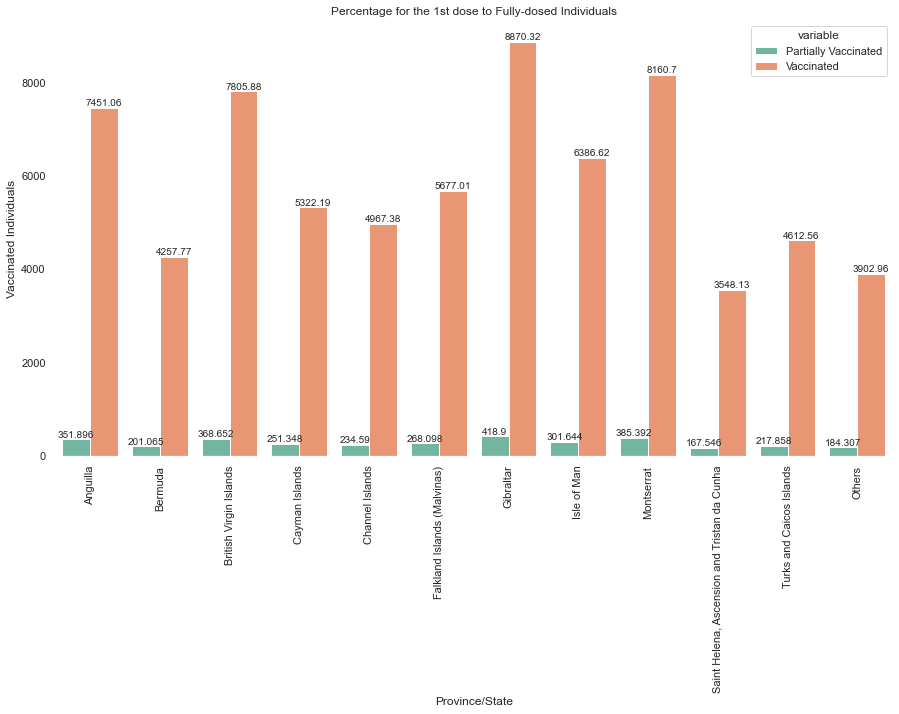

In [371]:
# Objective 1.c: Plot a vertical bar graph to display the percentage for the first dose to fully-dosed individuals.
# Create a Barplot by using melt() function.
covid_vac = pd.read_csv('covid_19_uk_vaccinated.csv')
covid_vac['Partially Vaccinated'] = covid_vac['First Dose'] - covid_vac['Second Dose']

covid_vac = pd.melt(covid_vac, id_vars =['Province/State', 'Country/Region', 'Date'], value_vars =['Partially Vaccinated', 'Vaccinated'])

plt.figure(figsize = (15,8))

# remove confidence interval (error lines) with "ci=None"
ax = sns.barplot(x='Province/State', y='value', hue='variable', data=covid_vac, ci=None, palette='Set2')

# Objective 1.d: Add distinct tick labels to the barplot to make it easier for the audience to read your plot
# Rotate the x labels to be readible. 
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_ylabel('Vaccinated Individuals')
ax.set_title('Percentage for the 1st dose to Fully-dosed Individuals')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

# Objective 1.e: Save this visualisation in an exported and shareable format (PNG).
plt.savefig('uk_type.png')

In [284]:
# Objective 2.a: Group the data by Province/State and Date, and aggregate the death count.
uk_death = covid[['Date','Province/State','Country/Region_x','Deaths']]

uk_death_2 = uk_death.groupby(['Date','Province/State'])['Deaths'].sum().reset_index()
uk_death_2.head()

,Date,Province/State,Deaths
0,2020-01-22,Anguilla,0.0
1,2020-01-22,Bermuda,0.0
2,2020-01-22,British Virgin Islands,0.0
3,2020-01-22,Cayman Islands,0.0
4,2020-01-22,Channel Islands,0.0


In [285]:
# 2.c: Group the data by Province/State aggregating the death count to determine 
# which Province/State causes the data set to be skewed. 

uk_death_state = uk_death.groupby('Province/State')['Date','Province/State','Deaths'].sum().reset_index()
uk_death_state

# Outliers: Anguilla, Falkland Islands (Malvinas), Saint Helena, Ascension and Tristan da Cunha and Others

/var/folders/2f/wnrnfhp12vd172l5w1xyffl00000gn/T/ipykernel_90380/1423957814.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  uk_death_state = uk_death.groupby('Province/State')['Date','Province/State','Deaths'].sum().reset_index()


,Province/State,Deaths
0,Anguilla,24.0
1,Bermuda,10353.0
2,British Virgin Islands,3573.0
3,Cayman Islands,911.0
4,Channel Islands,37130.0
5,Falkland Islands (Malvinas),0.0
6,Gibraltar,25412.0
7,Isle of Man,15051.0
8,Montserrat,539.0
9,Others,46987145.0


<AxesSubplot:xlabel='Date', ylabel='Deaths'>

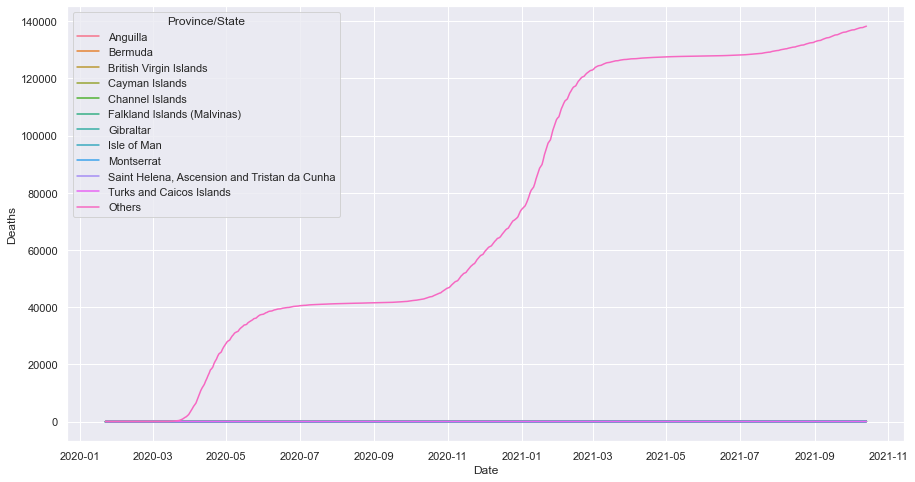

In [374]:
# 1st lineplot with all variables is skewed. Thus, removing outliers are considered.
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data=uk_death, x='Date', y='Deaths', hue='Province/State')

In [376]:
# Objective 2.d: Re-create the lineplot excluding the Province/State that is causing the skewed data set.
uk_death_state = uk_death.groupby('Province/State')['Date','Province/State','Deaths'].sum().reset_index()
uk_death_state

# Outliers: Anguilla, Falkland Islands (Malvinas), Saint Helena, Ascension and Tristan da Cunha and Others
# Remove the outliers and create a new dataframe "uk_death_2".
uk_death_2 = uk_death[(uk_death['Province/State'] != 'Anguilla') 
                     & (uk_death['Province/State'] != 'Falkland Islands (Malvinas)')
                     & (uk_death['Province/State'] != 'Saint Helena, Ascension and Tristan da Cunha')
                     & (uk_death['Province/State'] != 'Others')]

uk_death_2.head()

/var/folders/2f/wnrnfhp12vd172l5w1xyffl00000gn/T/ipykernel_90380/751205246.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  uk_death_state = uk_death.groupby('Province/State')['Date','Province/State','Deaths'].sum().reset_index()


,Date,Province/State,Country/Region_x,Deaths
632,2020-01-22,Bermuda,United Kingdom,0.0
633,2020-01-23,Bermuda,United Kingdom,0.0
634,2020-01-24,Bermuda,United Kingdom,0.0
635,2020-01-25,Bermuda,United Kingdom,0.0
636,2020-01-26,Bermuda,United Kingdom,0.0


<AxesSubplot:xlabel='Date', ylabel='Deaths'>

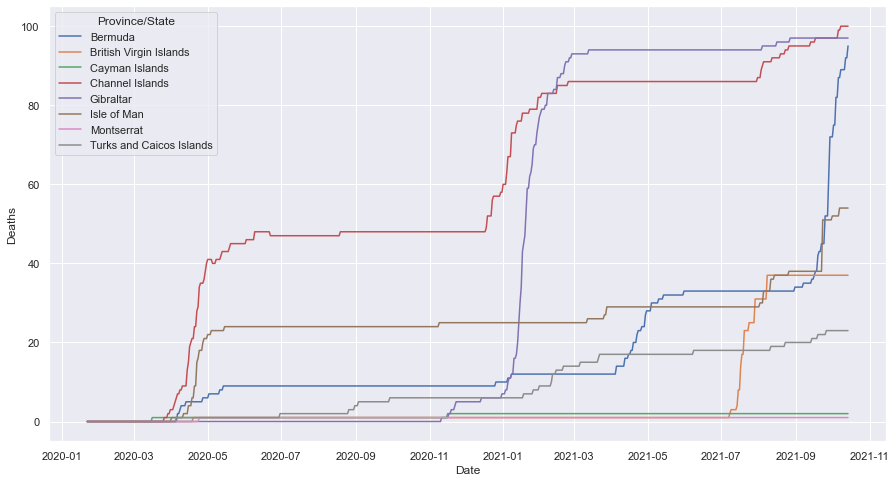

In [377]:
# Objective 2.d: Re-create the lineplot excluding the Province/State that is causing the skewed data set.

# 2nd lineplot without outliers was created. The trend is not smooth. Thus, coverting the date to months is considered.
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data=uk_death_2, x='Date', y='Deaths', hue='Province/State')

In [378]:
# Objective 2.e: Convert Date into Months.
uk_death_2['Month'] = pd.to_datetime(uk_death_2['Date'] + pd.offsets.MonthBegin(-1))

/var/folders/2f/wnrnfhp12vd172l5w1xyffl00000gn/T/ipykernel_90380/2820429646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_death_2['Month'] = pd.to_datetime(uk_death_2['Date'] + pd.offsets.MonthBegin(-1))


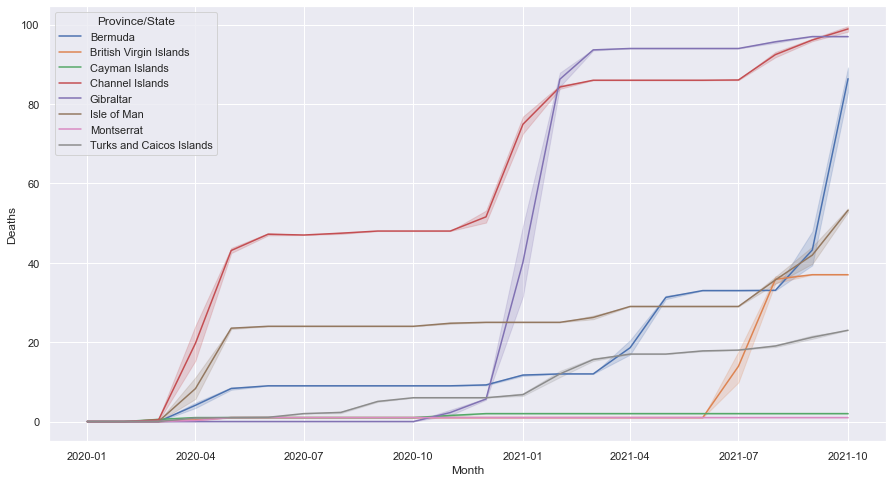

In [379]:
# Create the final lineplot with "Month".
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data=uk_death_2, x='Month', y='Deaths', hue='Province/State')

# Objective 2.f: Save this visualisation in an exported and shareable format (PNG).
plt.savefig('uk_deaths.png')

In [383]:
# Objective 3: Recoveries.
uk_recovered = covid[['Date','Province/State','Country/Region_x','Recovered']]
uk_recovered

# 3.a Group the data by Province/State, and aggregate the count of recovered cases and sort the values of recovered cases in ascending order.
uk_recovered_state_1 = uk_recovered.groupby(['Province/State'])['Date','Recovered'].sum().reset_index().sort_values(by='Recovered', ascending=True)
uk_recovered_state_1

# 3.c Group Province/State and Month to aggregate the count of recovered cases.
uk_recovered_state = uk_recovered.groupby(['Date','Province/State'])['Recovered'].sum().reset_index().sort_values(by='Recovered', ascending=True)
uk_recovered_state.head()

/var/folders/2f/wnrnfhp12vd172l5w1xyffl00000gn/T/ipykernel_90380/4149625138.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  uk_recovered_state_1 = uk_recovered.groupby(['Province/State'])['Date','Recovered'].sum().reset_index().sort_values(by='Recovered', ascending=True)


,Province/State,Recovered
10,"Saint Helena, Ascension and Tristan da Cunha",1135.0
9,Others,4115.0
8,Montserrat,6376.0
0,Anguilla,12708.0
5,Falkland Islands (Malvinas),14754.0
2,British Virgin Islands,64359.0
3,Cayman Islands,152052.0
7,Isle of Man,328319.0
1,Bermuda,363999.0
11,Turks and Caicos Islands,515923.0


In [380]:
# Objective 3.b: Convert Date into Months
uk_recovered_state['Month'] = pd.to_datetime(uk_recovered_state['Date'] + pd.offsets.MonthBegin(-1))

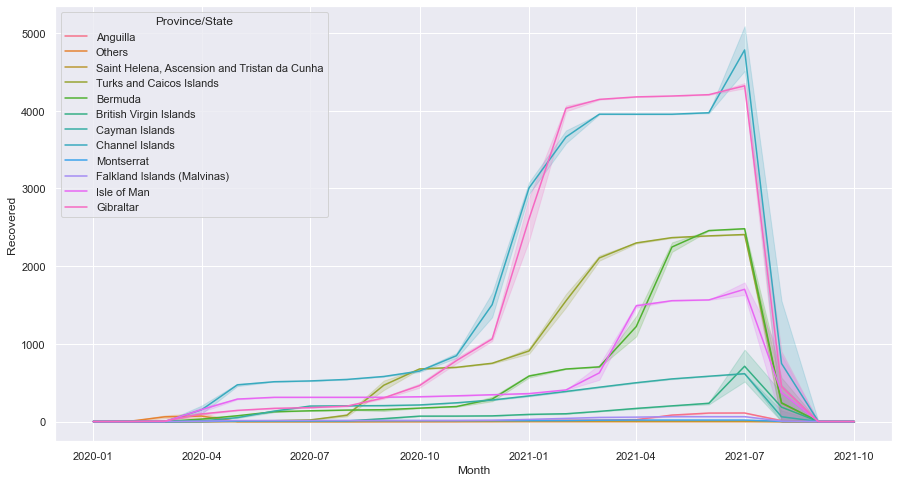

In [381]:
# Objective 3.d: Create a lineplot to visualise the trend of recovered cases across the months.
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data=uk_recovered_state, x='Month', y='Recovered', hue='Province/State')

# Objective 3.e: Save this visualisation in an exported and shareable format (PNG).
plt.savefig('uk_recovered.png')

/var/folders/2f/wnrnfhp12vd172l5w1xyffl00000gn/T/ipykernel_90380/2796632820.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  uk_hospital_1 = uk_hospital.groupby(['Province/State'])['Date','Hospitalised'].sum().reset_index()


<AxesSubplot:xlabel='Date', ylabel='Hospitalised'>

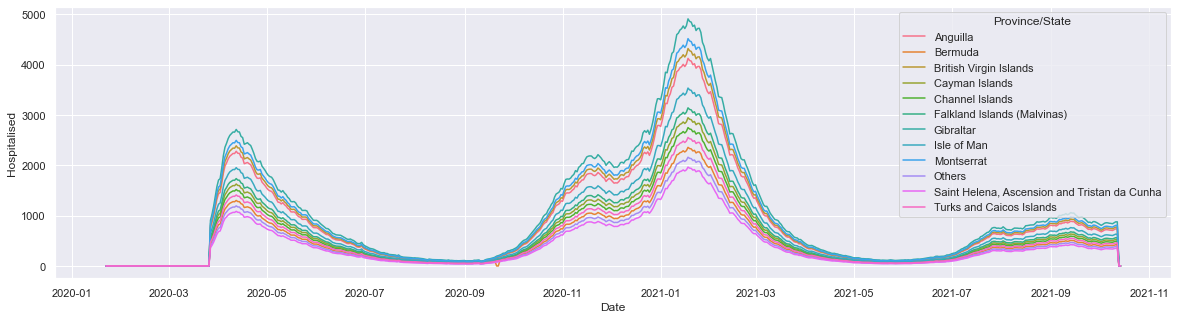

In [420]:
# Presentation Question 4:
# Which regions have experienced a peak in hospitalisation numbers?
# and if there are regions that have not reached a peak yet? 

uk_hospital = covid[['Date','Province/State','Country/Region_x','Hospitalised']]
uk_hospital = uk_hospital.groupby(['Province/State','Date'])['Hospitalised'].sum().reset_index()
uk_hospital_1 = uk_hospital.groupby(['Province/State'])['Date','Hospitalised'].sum().reset_index()
uk_hospital_1.tail().sort_values(by='Hospitalised',ascending=True)

sns.set(rc = {'figure.figsize':(20,5)})
sns.lineplot(data=uk_hospital, x='Date', y='Hospitalised', hue='Province/State')

<AxesSubplot:xlabel='Date', ylabel='Hospitalised'>

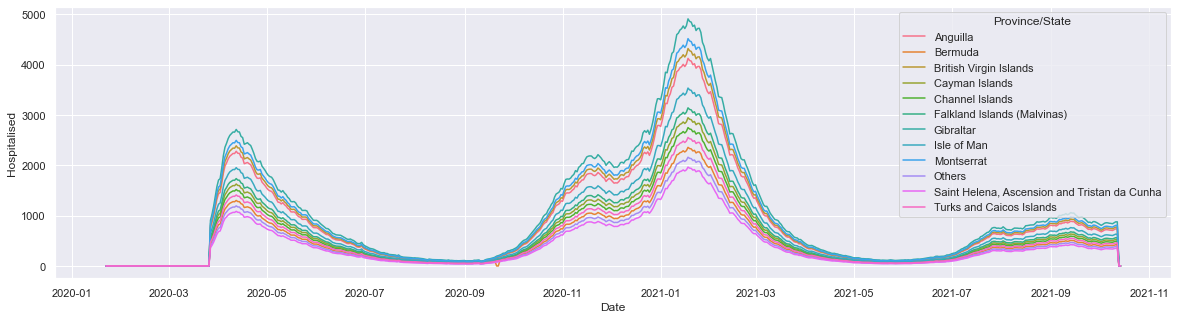

***Notes and observations:***
Your observations here. (Double click to edit)

***Examples could include:***
- Are there other trends in terms of recoveries or hospitalisations compared to other features that you found interesting and that may add value in terms of the decision making process?
- Any other observations regarding the data?
- Any suggestions for improvements and further analysis?
- What would your future data requirements be?

Based on the bar chart, the percentage of vaccinated is much higher than partially vaccinated cross all regions, demonstrating that most people in the UK have been fully vaccinated.
Regarding death rate, there are some outliers found when running the sum of deaths cross province/state, which cause the distribution skewed. Thus, groups “Anguilla, Falkland Islands (Malvinas), Saint Helena, Ascension and Tristan da Cunha and others” were removed. Based on the line chart, Bermuda and Isle of Man seem have not reached to the peak in October 2021, whilst other regions are presented more stable with their death rates. Also, the percentage of the fully vaccinated rates shows none of the regions has reached 100%. This explains that the government should focus on Bermuda and Isle of Man for the promotion of the second doses to cease the death rate.
Regarding recoveries, British Virgin Island and Gibraltar embrace the highest number. The recoveries cross regions have not consistent as the number drop rapidly approximately from August/September 2021, which can be assumed that less individual was tested positive; thus, less recovered numbers were reported.
The error line appears after the date concerts to month, noting that the number contains a certain level of confidence interval. The smoothness of the lines, the accuracy of the raw data and more annotates on the charts can increase the quality of my visualisation.
The visualisation can help the government to determine the targe regions for the campaign with direct and clear information. The bar chart provides the comparation of partially and fully vaccinated rate cross regions and the line charts informs the trend of death and recovery rate over time. It is easy for the government to spot the relevant information such as maximum, minimum in numbers and regions in different colours.

## 5) Assignment activity 5: External data 
In the next section, you were supplied with a sample file and the question was asked to determine whether there are additional `#tags` or keywords that could potentially provide insights into your COVID-19 analysis. While the sample set is limited, you were asked to review the provided file and demonstrate the typical steps and make recommendations regarding future use of similar data sets to provide richer insights.

### 5.1) Report expectations:
- Demonstrate basic ability to work with Twitter data.
- Search for hash-tags or keywords.
- Create DataFrames and visualisations.
- Note your observations.

## Fei's Approach

In [294]:
# Import the tweet data set
import pandas as pd
import seaborn as sns

In [295]:
# Explore the data: info(), head()
tweets = pd.read_csv('tweets.csv')

print(tweets.info())
print(tweets.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 3959 non-null   object 
 1   id                         3959 non-null   float64
 2   id_str                     3959 non-null   float64
 3   text                       3959 non-null   object 
 4   truncated                  3959 non-null   object 
 5   source                     3959 non-null   object 
 6   in_reply_to_status_id      0 non-null      float64
 7   in_reply_to_status_id_str  0 non-null      float64
 8   in_reply_to_user_id        0 non-null      float64
 9   in_reply_to_user_id_str    0 non-null      float64
 10  in_reply_to_screen_name    0 non-null      float64
 11  contributors               0 non-null      float64
 12  is_quote_status            3959 non-null   object 
 13  retweet_count              3960 non-null   int64

In [296]:
# Explore the structure, count the tweets, get the elements of interest
print(tweets.shape)
print(tweets.dtypes)

(3960, 21)
created_at                    object
id                           float64
id_str                       float64
text                          object
truncated                     object
source                        object
in_reply_to_status_id        float64
in_reply_to_status_id_str    float64
in_reply_to_user_id          float64
in_reply_to_user_id_str      float64
in_reply_to_screen_name      float64
contributors                 float64
is_quote_status               object
retweet_count                  int64
favorite_count                 int64
favorited                     object
retweeted                     object
lang                          object
possibly_sensitive            object
quoted_status_id             float64
quoted_status_id_str         float64
dtype: object


In [297]:
tweets.retweet_count.value_counts()

0       2818
1        570
2        190
3         96
4         54
5         33
6         29
7         17
8         14
11        10
14        10
10         9
9          8
17         8
21         6
12         6
19         5
13         5
16         5
28         4
44         3
27         3
23         3
15         3
37         3
38         2
107        2
54         2
67         2
43         2
25         2
65         1
63         1
48         1
85         1
29         1
30         1
22         1
130        1
89         1
398        1
18         1
32         1
466        1
112        1
90         1
319        1
253        1
116        1
304        1
60         1
79         1
1565       1
369        1
56         1
42         1
118        1
199        1
195        1
963        1
24         1
31         1
49         1
33         1
261        1
212        1
52         1
Name: retweet_count, dtype: int64

In [298]:
tweets.favorite_count.value_counts()

0       2240
1        682
2        252
3        174
4        100
5         75
6         51
7         39
8         38
9         24
10        22
11        16
13        15
12        13
17        12
14        12
24        11
15        11
18         8
16         8
25         7
19         7
22         6
29         5
20         5
23         5
21         5
30         4
39         3
31         3
26         3
40         3
53         3
242        2
27         2
81         2
32         2
47         2
48         2
45         2
89         2
43         2
70         2
33         2
185        2
28         2
65         2
181        1
57         1
71         1
293        1
145        1
621        1
837        1
80         1
149        1
909        1
2251       1
44         1
4376       1
1003       1
66         1
140        1
264        1
72         1
3496       1
649        1
766        1
722        1
79         1
317        1
228        1
85         1
169        1
183        1
147        1
582        1

In [299]:
# 2. Create a DataFrame with the "text" only
tweets_text = tweets['text']

In [300]:
# 2.a Loop through the messages and build a list of values containing the #-symbol
# Note: col in dataframe is a series (with strings), only strings can use "extractall" or "findall" function. 
tweets_text = tweets['text']

# Use str.extratall to find hashtags ("\w" means "any word character").
tweets_count = tweets_text.str.extractall(r'(\#\w*)')[0].value_counts()

# Covert Series.to_frame.
tweets_count_df = tweets_count.to_frame()

# Change the coloumn name from 0 to count.
tweets_count_df.columns = ['count']

# Convert index of a pandas dataframe into a column.
tweets_count_df['tags'] = tweets_count_df.index

# Display 30 records.
tweets_count_df[['tags','count']].head(30)

,tags,count
#COVID19,#COVID19,1981
#CovidIsNotOver,#CovidIsNotOver,631
#China,#China,376
#coronavirus,#coronavirus,216
#covid19,#covid19,198
#Covid19,#Covid19,187
#COVID,#COVID,138
#Greece,#Greece,134
#Shanghai,#Shanghai,108
#covid,#covid,107


In [301]:
# Filter and sort
# Use str.contains to filter the string with covid, Covid or COVID.
tweets_count_covid = tweets_count_df[tweets_count_df['tags'].str.contains\
                                     ('(#covid|#Covid|#COVID|#coronavirus|#Coronavirus|#Corona|#corona)', \
                                      regex=True)]

# Exclude the words with low counts.
tweets_count_covid_top = tweets_count_covid[tweets_count_covid['count'] > 80]
tweets_count_covid_top

/var/folders/2f/wnrnfhp12vd172l5w1xyffl00000gn/T/ipykernel_90380/1374223557.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  tweets_count_covid = tweets_count_df[tweets_count_df['tags'].str.contains\


,count,tags
#COVID19,1981,#COVID19
#CovidIsNotOver,631,#CovidIsNotOver
#coronavirus,216,#coronavirus
#covid19,198,#covid19
#Covid19,187,#Covid19
#COVID,138,#COVID
#covid,107,#covid
#CoronaUpdate,84,#CoronaUpdate
#COVID2020,82,#COVID2020
#COVID19Pandemic,81,#COVID19Pandemic


[Text(0, 0, '1981'),
 Text(0, 0, '631'),
 Text(0, 0, '216'),
 Text(0, 0, '198'),
 Text(0, 0, '187'),
 Text(0, 0, '138'),
 Text(0, 0, '107'),
 Text(0, 0, '84'),
 Text(0, 0, '82'),
 Text(0, 0, '81')]

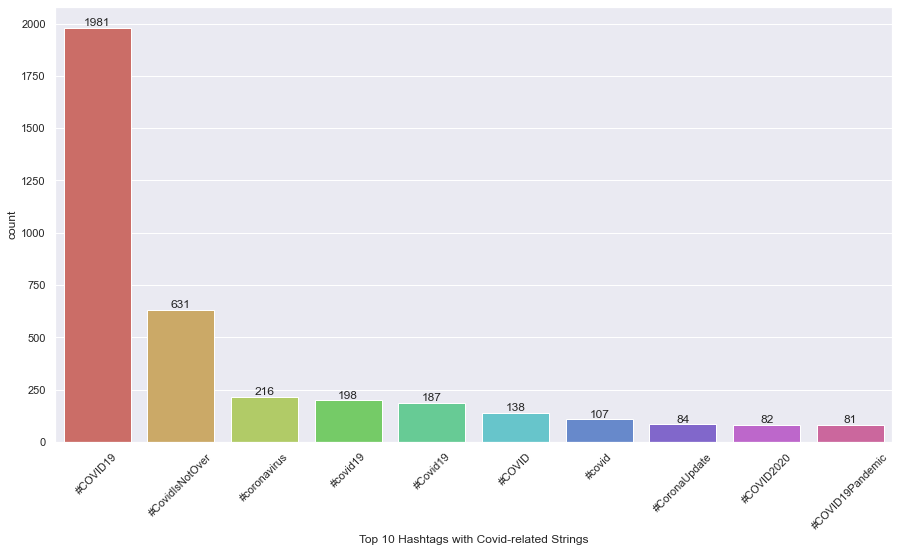

In [302]:
# Plot
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))

ax = sns.barplot(data=tweets_count_covid_top, x='tags', y='count', palette = "hls")

# Format the plot.
# Rotate the x labels to be readible. 
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

# Change the name of xlabel to be understood easily.
ax.set_xlabel('Top 10 Hashtags with Covid-related Strings')

# Display Values on bars.
ax.bar_label(ax.containers[0])

## Norah's Approach

In [303]:
# Convert text to string
tweets['text'] = tweets['text'].astype(str)

# Create a new DataFrame with only text values
tweets_text = tweets['text'].apply(lambda x: x if x.strip() != None else None)

In [304]:
# Loop through the messages and build a list of values containing the #-symbol

tags = []

for y in [x.split(' ') for x in tweets_text.values]:
    for z in y:
        if '#' in z:
            tags.append(z)

tags = pd.Series(tags).value_counts()

tags.head(30)

#COVID19                1632
#CovidIsNotOver          472
#China                   262
#covid19                 176
#Covid19                 148
#COVID                   108
#covid                   104
#Greece                  103
#coronavirus             100
#PeoplesVaccine.          84
#CoronaUpdate             84
#Omicron                  83
#COVID2020                82
#covid19uk                80
#CoronavirusOutbreak      80
#COVID19Pandemic          80
#monkeypox                77
#globalhealth             76
#publichealth             72
#healthtech               69
#COVID2019                69
#datascience              66
#data                     66
#analytics                64
#Shanghai                 63
#Covid_19                 63
#datavisualization        63
#pandemic                 60
#Athens                   55
#Beijing                  50
dtype: int64

In [305]:
# Covert Series to DataFrame.
data = pd.DataFrame(tags).reset_index()

# Rename the cols.
data.columns = ['tags', 'count']

# Fix 'count' type.
data['count'] = data['count'].astype(int)
data.head()

,tags,count
0,#COVID19,1632
1,#CovidIsNotOver,472
2,#China,262
3,#covid19,176
4,#Covid19,148


,tags,count
0,#COVID19,1632
1,#CovidIsNotOver,472
2,#China,262
3,#covid19,176
4,#Covid19,148
5,#COVID,108
6,#covid,104
7,#Greece,103


[Text(0, 0, '1632'),
 Text(0, 0, '472'),
 Text(0, 0, '262'),
 Text(0, 0, '176'),
 Text(0, 0, '148'),
 Text(0, 0, '108'),
 Text(0, 0, '104'),
 Text(0, 0, '103')]

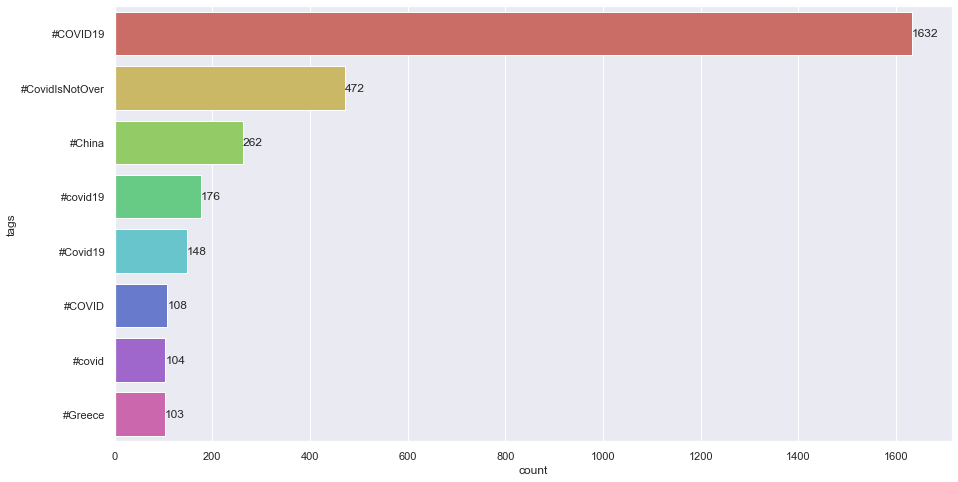

In [306]:
# Display the count over 100
display(data.loc[data['count'] > 100])

#Plot
ax = sns.barplot(data=data.loc[data['count'] > 100], y='tags', x='count', palette = "hls")
# Display Values on bars.
ax.bar_label(ax.containers[0])

## Text Review

In [307]:
# Manual List of stopwords to be removed.

sw_list = ['a','about','above','actually','after','again','against','all','almost','also','although',\
           'always','am','an','and','any','are','as','at','be','became','because','been','before','being',\
           'below','between','both','but','by','can','could', 'did','do','does','doing','down','during',\
          'each','either','else','few','for','from','further','had','has','have','having','he','hence','how',\
           'I','if','in','into','is','it','its','just','may','maybe','me','might','mine','more','most','must','my',\
           'myself','neither','nor','not','of','oh','ok','same','she','should','so','some','such','than','that',\
           'the','their','theirs','them','themselves','then','there','these','they','this','those','through','to',\
           'too','very','was','we','were','what','when','whenever','where','whereas','wherever','whether','which',\
           'while','who','whoever','whose','whom','why','will','with','within','would','yes','yet','you','your',\
           'yours','yourself','yourselves','one','all','&amp','&amp;','-','I','i',' ','on',',']

In [308]:
# Covert the text of the tweets to a list of tweets.
tweets_text_values = tweets_text.values

# Covert each of the tweet to a list (no space).
tweets_text_value_words = [x.split(' ') for x in tweets_text_values]

# Create an empaty list 
tweets_text_value_words_all = []

# Append to the list and remove 
tweets_text_value_words_all = [z for y in tweets_text_value_words for z in y if 'http' not in z and not z.startswith(('@','#')) and z.lower() not in sw_list]

tweets_text_value_words_all = pd.Series(tweets_text_value_words_all).value_counts()
tweets_text_value_words_all.head(10)

            1738
Covid        348
people       303
Greece       275
COVID-19     267
cases        228
Athens,      211
Athens       209
new          205
COVID        198
dtype: int64

In [309]:
# Use the Series to create a DataFrame for viz.
data_2 = pd.DataFrame(tweets_text_value_words_all.head(16)).reset_index()

# Rename the col.
data_2.columns = ['tags','count']

# Exclude the tags with empty string.
data_2 = data_2[data_2['tags'].str.strip('tags') != '']

# Display.
data_2

,tags,count
1,Covid,348
2,people,303
3,Greece,275
4,COVID-19,267
5,cases,228
6,"Athens,",211
7,Athens,209
8,new,205
9,COVID,198
10,or,192


[Text(0, 0, '348'),
 Text(0, 0, '303'),
 Text(0, 0, '275'),
 Text(0, 0, '267'),
 Text(0, 0, '228'),
 Text(0, 0, '211'),
 Text(0, 0, '209'),
 Text(0, 0, '205'),
 Text(0, 0, '198'),
 Text(0, 0, '192'),
 Text(0, 0, '175'),
 Text(0, 0, '153'),
 Text(0, 0, '147'),
 Text(0, 0, '143'),
 Text(0, 0, '142')]

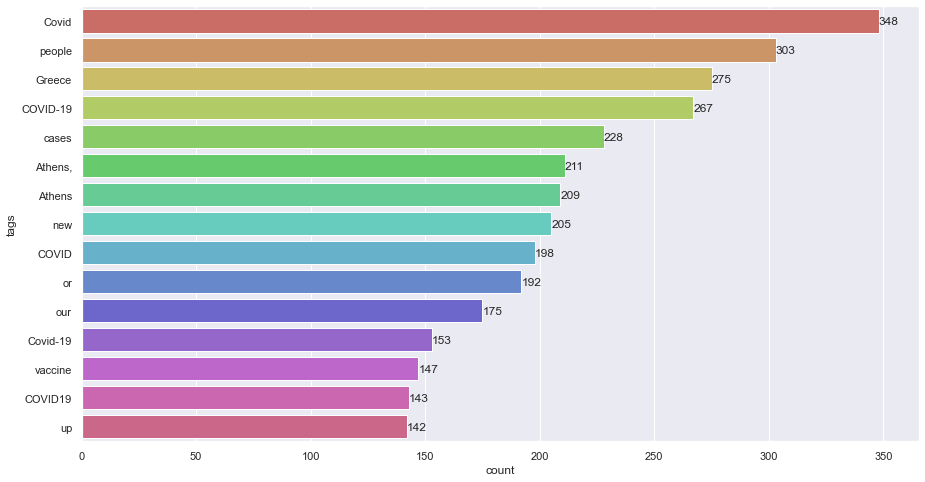

In [310]:
# Plot
ax = sns.barplot(data=data_2, y='tags', x='count', palette = "hls")

# Display Values on bars.
ax.bar_label(ax.containers[0])

In [311]:
dft = pd.DataFrame(tweets_text_values)
dft.columns = ['Tweets']

# Create a subset of a DataFrame containing identified words 'cases' and 'risks'
sub = dft[dft['Tweets'].str.contains('cases','risks')]

# Loop Through the DataFrame and print.
for i in sub.index:
    # Print the sequnce of each Tweet.
    print("Tweet", i)
    # Print the content of each Tweet.
    print(sub.loc[i,"Tweets"],'\n')

Tweet 38
More than 90% of those infected with COVID-19 show no symptoms
but the rest of the infected cases had either Type 2 diabetes, cardiovascular diseases, hypertension, and/or cancer, which means people with obesity  show severe symptoms.
#paraphrase
#COVID19
https://t.co/ZEtNx7f4jE 

Tweet 65
The CDC investigates mysterious cases of #PediatricHepatitis. Find out about this and more, including stories on diabetes' effect on #COVID19 outcomes and prioritization of future #cancer prevention for adolescent and young adult cancer survivors.
https://t.co/VlHgXy6Afg 

Tweet 77
Pregnant women have a low risk of having severe symptoms; however, in some cases -- especially those with obesity or gestational diabetes, or who are old, or who have underlying diseases -- they may have severe symptoms. 

#COVID19 https://t.co/4SG3GAMx04 

Tweet 190
Public Health Ontario's latest data on #COVID19 cases in ON, incl TO, is now available: https://t.co/oUxcc69p2S. 

TPH's case counts dashboard is upd

In [393]:
# Presentation Question 3: What other types of Twitter data points and tweets have both #coronavirus and #vaccinated hashtags.

dft = pd.DataFrame(tweets_text_values)
dft.columns = ['Tweets']

# Create a subset of a DataFrame containing identified words 'coronavirus' and 'vaccinated'
sub = dft[dft['Tweets'].str.contains('#coronavirus') & dft['Tweets'].str.contains('#vaccinated')]
sub = dft[dft['Tweets'].str.contains('#vaccinated')]

# Loop Through the DataFrame and print.
for i in sub.index:
    # Print the sequnce of each Tweet.
    print("Tweet", i)
    # Print the content of each Tweet.
    print(sub.loc[i,"Tweets"],'\n')

Tweet 207
Does anyone know if there are stats on how many of the monkeypox cases are in ppl who are #vaccinated against #COVID19? It is possible that it is a side effect of the #CovidVaccine no? Shingles is a possible side effect of the vax, and it looks just like shingles. No? 

Tweet 332
Today I tested positive for #MonkeyPox. I am fortunate that my symptoms are completely non-existent, as I have gotten all of the #COVID19 vaccines and 8 boosters. I urge everyone to do their part and get #vaccinated and #boosted, wear at minimum 4 masks at all times. 

Tweet 611
💉 💉  When we get #vaccinated, we protect ourselves and our community.  

Ensuring equitable access to #COVID19 vaccines will help end the pandemic. 🛑   

#VaccinEquality 

Tweet 723
Hi, ASEAN family

#NewsFromVietnam🇻🇳

#COVID19 #Vietnam🇻🇳 as 23 May 2022

😷New Confirmed Cases: 1,179
🦠Cumulative number of cases: 10,710,066 (+1,179)
👍🏻Recoveries: 9,405,908
📣Fatalities: 43,076

📸@VietnamNewsVNS

#Vietnam
#vaccinated             

### 5.2) Presentation expectations:
Discuss whether external data could potentially be used and whether it is a viable solution to pursue. Discuss your assumptions and suggestions. 

Points to consider:
- What insights can be gained from the data?
- What are the advantages and disadvantages of using external data?
- How would you suggest using external data in the project?

I decided to keep my approach and Norah’s one as I find they can apply to different scenarios. I chose to use “string.extractall()” function to extract all hashtags and converted the series to a DataFrame. I was struggling with this part previously as I didn’t notice that some functions can only be applied to strings/series instead of other types. The result displayed the top 30 hashtags in the file. To filter the hashtags with covid-related strings, I used “str.contains()” function and some hashtags were excluded as the count is relatively low. Only top 10 was displayed. Formatting was applied to make the chart easier to read. Finally, the chart demonstrates that “#COVID19, #CovidIsNotOver, #coronavirus, #covid19/Covid19 and #COVID/covid” are the hottest hashtags, which #COVID19 was used for nearly 2,000 times, following by #CovidIsNotOver. The hashtag “#CovidIsNotOver” is quite interesting as people who tagged this might have a different view towards current vaccination scheme or other ideas towards post-pandemic lives. I would apply sentiment analysis to understand the cyber behaviour more.
Norah’s approach provides more information of the content in each tweet. The result displays the relevant information between tweets. I would investigate the content of the tweets to analyse the corelation. For example, “Pregnant women have a low risk of having severe symptoms” shows how “risk” is related to “cases” and the sentiment should be relatively positive. In this approach, we could understand people’s reaction towards the government scheme and future for post-pandemic lives.

## 6) Assignment activity 6: 

## Week 6: Assignment (Partial notebook)

The government employed an external consultant to assist with data analysis. However, the consultant resigned and left the project in a half-completed state. The government provided you with the partially completed Jupyter Notebook that the consultant developed. They asked you to evaluate and complete the Jupyter Notebook with Python code.

This assignment activity will consist of two parts: (1) demonstrate the use of the functions provided, and (2) answer additional questions posed by the government. The questions are:

- What is the difference between qualitative and quantitative data? How can these be used in business predictions?
- Why is continuous improvement required? Can we not just implement the project and move on to other pressing matters?
- As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. Does that mean we can ignore data ethics?

In [313]:
# Libraries and settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [314]:
# Load and select relevant subset of the data
# Make sure to change the relative path to function in your environment
ds1 = pd.read_csv('covid_19_uk_cases.csv')
ds2 = pd.read_csv('covid_19_uk_vaccinated.csv')

sample = ds1[['Province/State','Date','Hospitalised']]

In [315]:
# Select data for a specific province
sample_ci = sample[sample['Province/State'] == "Channel Islands"]
sample_ci.index = sample_ci['Date'] 
sample_ci

,Province/State,Date,Hospitalised
Date,,,
2020-01-22,Channel Islands,2020-01-22,0.0
2020-01-23,Channel Islands,2020-01-23,0.0
2020-01-24,Channel Islands,2020-01-24,0.0
2020-01-25,Channel Islands,2020-01-25,0.0
2020-01-26,Channel Islands,2020-01-26,0.0
2020-01-27,Channel Islands,2020-01-27,0.0
2020-01-28,Channel Islands,2020-01-28,0.0
2020-01-29,Channel Islands,2020-01-29,0.0
2020-01-30,Channel Islands,2020-01-30,0.0


In [316]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')
    plt.xticks(rotation = 45, fontsize = 12)
    plt.rcParams['axes.facecolor'] = 'white'
    plt.xlabel('Time-Series', fontsize = 12)

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe
    plt.plot(series[window:], label='Actual values')
    plt.grid(True)
    plt.legend(loc='best')

In [317]:
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

### Question 1:

The consultant indicated that the function is functional, but did not demonstrate how to use it. Use the provided function, `plot_moving_average()`, to plot the data for the selected province (variable name is `sample_ci` and set the window parameter to 7 days. 

### Answer: The consualtant tried to achieve...
plot_moving_average() function can be used to understand the upper bound and lower bound of data points. The plot below demonstrates the time-series forecasting between 2021-01 to 2021-11 to visualise the standard deviation of the rolling mean for each day.

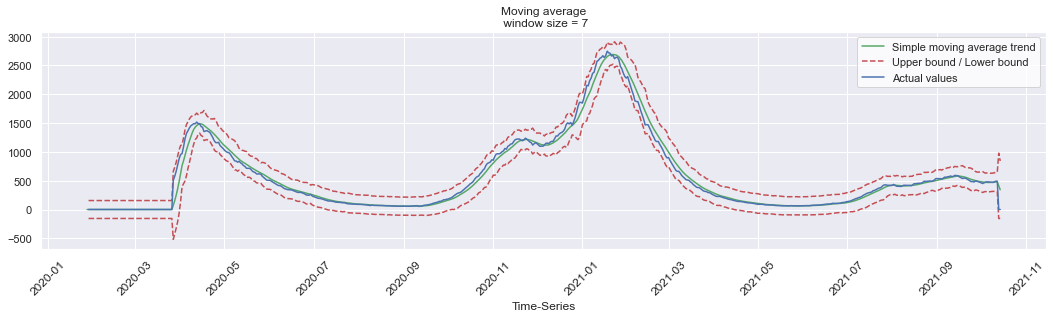

In [318]:
# Covert Index to DateIndex.
sample_ci = sample[sample['Province/State'] == "Channel Islands"]
sample_ci.index = pd.DatetimeIndex(sample_ci['Date'])

# Resample the data.
sample_ci_r = sample_ci.resample('D').mean()
sample_ci_r.head()

# Drop the missing values.
sample_ci_r.dropna(inplace= True)
sample_ci_r.isna().sum()

# Demonstrate the use of the function to plot moving averages.
# The red dotted-line shows the upper/lower bound and green line shows the simple moving average trend.
# Window = 7
plot_moving_average(sample_ci_r.Hospitalised, 7, plot_intervals=True)

### Question 2:

The consultant performed a calculation that looks interesting, but the team is unsure about what the intention was and how to interpret the output. Can you offer some insights into the meaning of the code and output in the cell below? Is it useful?

### Answer: The consualtant tried to achieve...
The syntax below can be used to understand the mean absolute error between the actual and seven-day rolling average. Firstly, a copied DataFrame was created. Secondly, define "s_rolling" to calculate the mean of each day. Thirdly, create a new column "error" in DataFrame "s" and use mean_absolute_error() function to calculate the mean absolute error for each day. Finally, sort the values and Display the top 3 values of mean absolute errors.

In [319]:
# Return the top three days with biggest difference between daily value and rolling 7-day mean
# Create a DataFrame to calculate the top3.
s = sample_ci.copy()

# Calculate the mean for 7-days moving average.
s_rolling = s['Hospitalised'].rolling(window=7).mean()

# Add 'errors' column to input the values of the mean absolute errors.
s['error'] = mean_absolute_error(s['Hospitalised'][7:], s_rolling[7:])

# Display the DataFrame with top 3 and sort the values.
s.sort_values('error', ascending=False).head(3)

,Province/State,Date,Hospitalised,error
Date,,,,
2020-03-27,Channel Islands,2020-03-27,509.0,436.285714
2020-03-28,Channel Islands,2020-03-28,579.0,423.571429
2020-03-29,Channel Islands,2020-03-29,667.0,416.285714


### Question 3:

The management team had some additional questions around the project where they asked for further feedback to be included in your final presentation. Make sure to answer the questions in the Notebook in Markdown format in preparation for your presentation. The expectation is that you will provide short and direct responses to help them understand the importance and impact of the questions below.

> ***Note:*** You can double-click on the markdown cells to edit the text.

#### Question 3.1 (double click cell to edit)
- What is the difference between qualitative and quantitative data? How can these be used in business predictions?

A qualitative method is an approach that achieves assumptions based on the opinions or judgements of customers and professions. This method is usually used when there is a lack of historic data. However, a qualitative method can build a deep understanding of an occurrence even though the data can be vulnerable sometimes. On the other hand, quantitative research can analyse the data statistically by quantifying the data and “test hypotheses, make predictions and generalize results to the population of interest” from large samples (Chrysochou, 2017, p.412; Malhotra et al., 2012). It is better in terms of efficiency and accuracy. Examples of quantitative forecasting methods are “causal, correlational or observational, and time-series methods”.

#### Question 3.2 (double click cell to edit)
- Can you provide you observations around why continuous improvement is required, can we not just implement the project and move on to other pressing matters?

Continuous improvement is important as it can ensure constituency and accuracy to optimise a process. Continuous improvement can help a business to envision better operations and make better decisions to achieve business goals. We are unable to just implement the project and move on to other matters as continuous improvement is not only about “Plan and Do” but also about “Check and Act”. The process of “Check and Act” can help to monitor and review the implementation as well as update and improve the operations. If we neglect “Check and Act”, the project is likely to be out of track and ends up not aligning with business goals. Thus, continuous improvement is vital in business operations.

#### Question 3.3 (double click cell to edit)
- As a government, we adhere to all data protection requirements and have good governance in place. Does that mean we can ignore data ethics? We only work with aggregated data and therefore will not expose any personal details? (Provide an example of how data ethics could apply to this case; two or three sentences max)

Data ethics should be seen as a serious topic as it affects people and society. Aligning with data ethics can not only reduce the impact on people and society but also prevent the risk of “fraud, data misuse, unauthorised use, and phishing schemes”. Although we don’t expose any personal details, the risk mentioned above might cause a negative influence on a business in the community. In worse-case scenarios, a business can cost a lot if a competitor starts a lawsuit against the company. Thus, data ethics must be seen as essential in businesses.